In [1]:
%load_ext autoreload

In [2]:
%autoreload 1

In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 9)  # figure width and height
plt.rcParams["font.size"] = 20            # fontsize in plots

In [4]:
import numpy as np
import scipy
import pandas as pd
#import xarray as xr
import math

In [5]:
import corsika
import os.path

In [6]:
fp = corsika.ShowerFile("showers/proton/DAT000001")
fg = corsika.ShowerFile("showers/gamma/DAT000001")

#fp = corsika.ShowerFile("showers/proton/DAT000002")
#fg = corsika.ShowerFile("showers/gamma/DAT000002")


In [7]:
fg.n_events # number of showers in file

50

In [8]:
shower = fg.shower(1)
shower.energy / 1000 # TeV

1.0

In [9]:
len(list(shower.particles))

1756

In [10]:
# count muons
len([p for p in shower.particles if p.corsika_code in [5, 6]])

0

In [11]:
# count em
len([p for p in shower.particles if p.corsika_code in [1, 2, 3]])

1756

In [12]:
np.rad2deg(shower.zenith)

0.0

In [13]:
parts = pd.DataFrame([[p.x/100, p.y/100, p.px, p.py, p.kinetic_energy, p.t_or_z, p.corsika_code, p.name] 
                      for p in shower.particles],
                      columns = ('x', 'y', 'px', 'py', 'E', 't', 'code', 'name'))

In [14]:
partsp = pd.DataFrame([[p.x/100, p.y/100, p.px, p.py, p.kinetic_energy, p.t_or_z, p.corsika_code, p.name] 
                       for p in fp.shower(1).particles],
                      columns = ('x', 'y', 'px', 'py', 'E', 't', 'code', 'name'))

In [15]:
parts['r'] = np.sqrt(parts.x**2 + parts.y**2)

In [16]:
parts[np.all((parts.r > 100, parts.t < 10), 0)]

,x,y,px,py,E,t,code,name,r
142,140.753164,85.390986,0.000922,0.000603,0.035458,8.312304,1,gamma,164.630112
188,-7.219269,-173.910879,-0.000109,-0.002373,0.072945,9.605272,1,gamma,174.060655
261,61.454819,-108.811123,0.000064,-0.000081,0.001616,8.140429,1,gamma,124.966217
336,130.055059,-86.804004,0.003614,-0.005257,0.178249,8.749804,1,gamma,156.362570
337,122.654922,-91.869014,0.000023,-0.000203,0.006202,9.449022,1,gamma,153.245377
340,122.318496,-89.373525,-0.000110,0.000134,0.006197,9.519335,1,gamma,151.490731
341,122.308213,-89.386699,-0.001095,0.002931,0.127691,9.519335,2,e+,151.490201
346,11.312491,109.330039,-0.000016,0.000558,0.019647,6.038866,1,gamma,109.913738
418,58.766772,90.303770,0.000119,0.000067,0.003847,6.820116,1,gamma,107.741841
421,61.924980,93.211953,0.004250,0.002631,0.054779,7.738084,1,gamma,111.906977


In [17]:
rg = 300

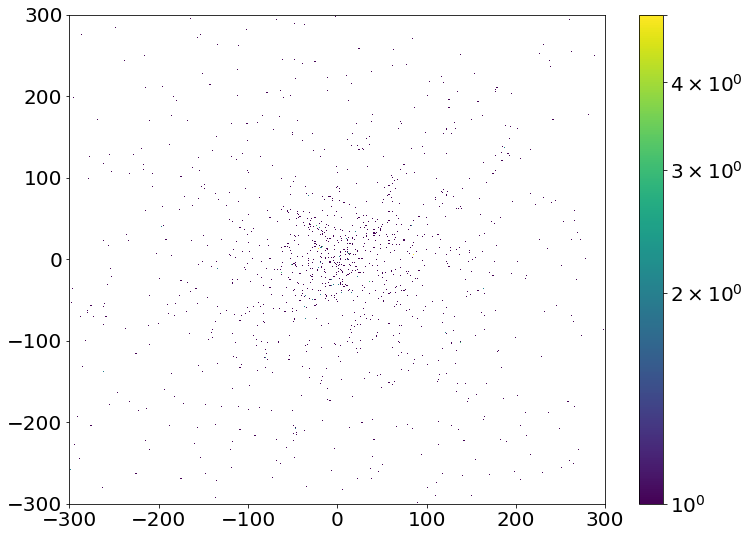

In [20]:
plt.hist2d(parts.x, parts.y, bins=500, norm=mcolors.LogNorm(), range=[[-rg, rg], [-rg, rg]])
plt.colorbar()
plt.show()
None

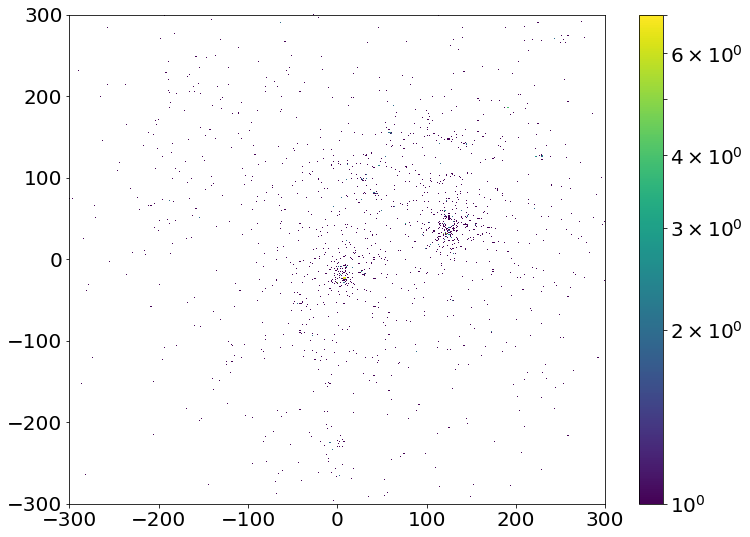

In [21]:
plt.hist2d(partsp.x, partsp.y, bins=500, norm=mcolors.LogNorm(), range=[[-rg, rg], [-rg, rg]])
plt.colorbar()
plt.show()
None